In [80]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut, ShuffleSplit, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


%matplotlib inline

# Get Data :

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Bureau\\selfeducations\\projects\\LR prj\\Ecommerce Customers.csv')

#### show head of data 

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### show the columns in data  : 

In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#### show data types of each columns : 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Descriptive statistic : 

## descriptive statistic for numerical columns : 

##### check if there is NaN in our data set  :  

In [10]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
# there is no NaN i our data  

In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Correlation Analysis : 

In [49]:
# Create correlation matrix : 
correlation_matrix = df.corr()
# show the correlation matrix : 
correlation_matrix

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [12]:
#  there is a significant relationship between the length of membership and the yearly amount spent.

## exploratory data Alaysis : 

### Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

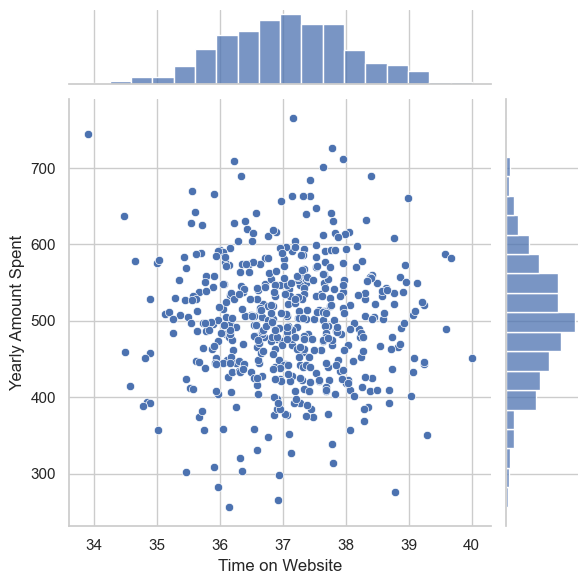

correlation coefficient (3,5) =  -0.0026408446721588943


In [28]:
sns.set(style='whitegrid')
sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent',data = df,kind = 'scatter')
correlation_coefficient_3_5 = df['Time on Website'].corr(df['Yearly Amount Spent'])
plt.show()
print('correlation coefficient (3,5) = ', correlation_coefficient)

### Using seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns. Does the correlation make sense?

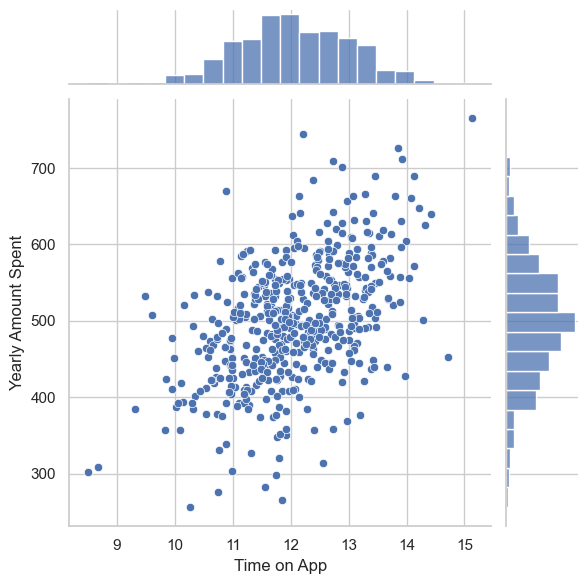

correlaion coeffivient(2,5) =  0.49932777005345036


In [30]:
sns.set(style='whitegrid')
sns.jointplot(x ='Time on App',y = 'Yearly Amount Spent',data = df , kind = 'scatter')
correlaion_coeffivient_2_5 = df['Time on App'].corr(df['Yearly Amount Spent'])
plt.show()
print('correlaion coeffivient(2,5) = ',correlaion_coeffivient_2_5)

### Let's explore these types of relationships across the entire data set. Using pairplot to recreate the plot below

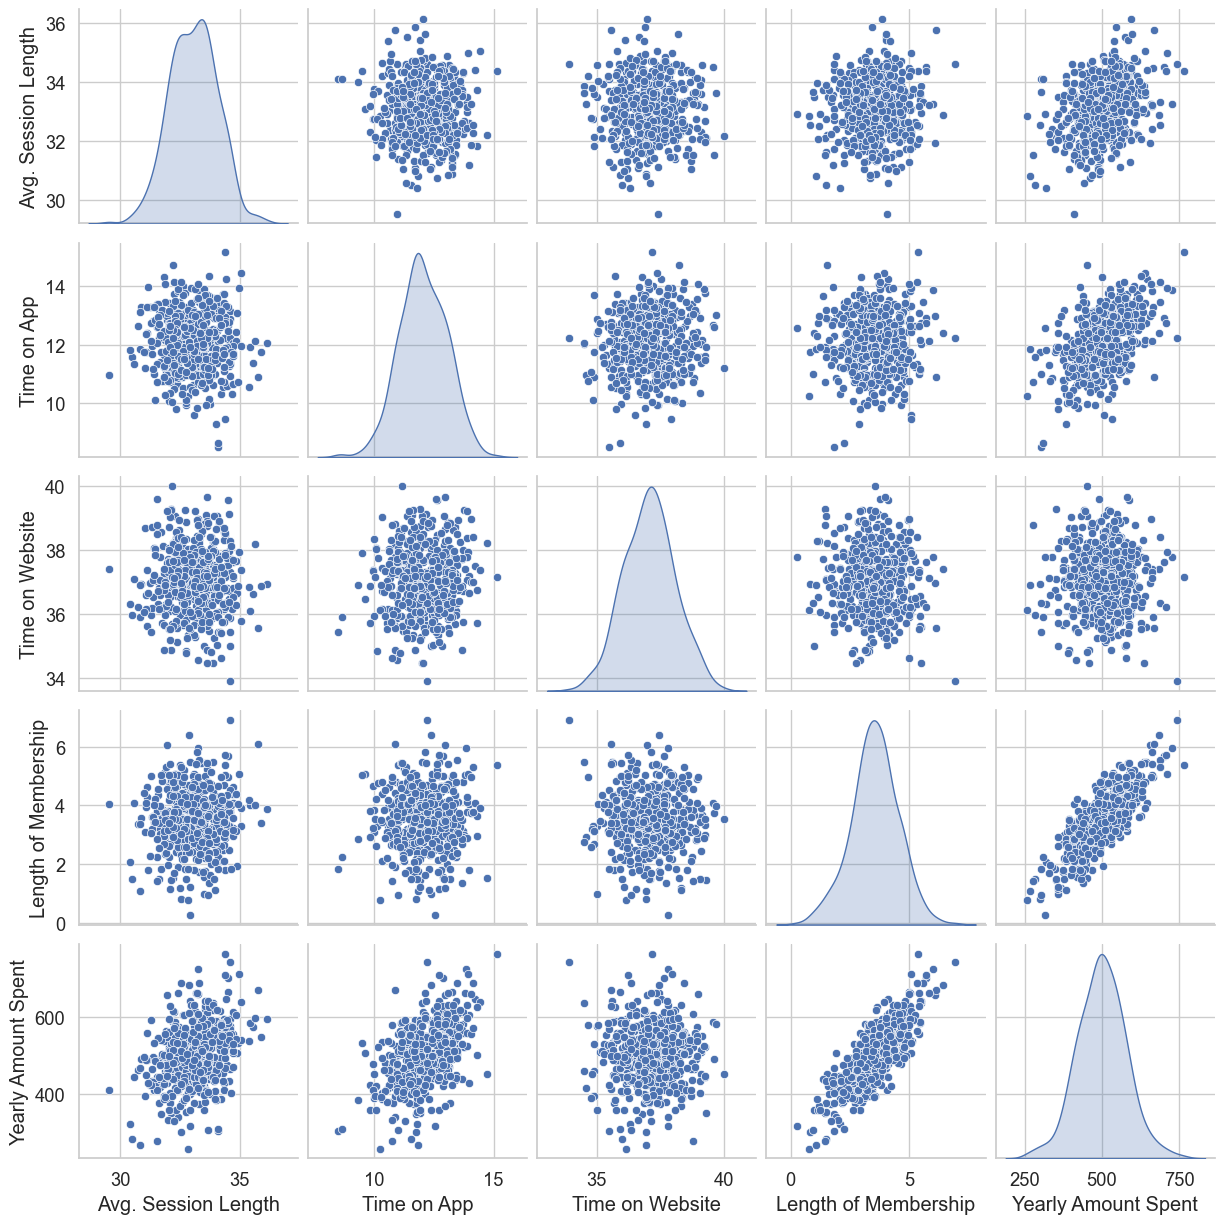

In [47]:
sns.pairplot(df,  palette='Set1', diag_kind='kde', markers='o')
# Suppress specific warnings
warnings.filterwarnings("ignore", message=".*palette.*")
warnings.filterwarnings("ignore")
# Show the Plot 
plt.show()

### creating a linear model plot (usnig lmplot ) of yearly amount spent Vs length of mumbership 

 pairplot arguments:

1- hue: The hue argument is set to 'Avatar', which will color the data points based on the different avatar categories.

2- palette: The palette argument is set to 'Set1', which is a color palette from Seaborn used for coloring the data points.

3- markers: The markers argument is set to ['o', 's', 'D'], which specifies different markers for the data points corresponding to different avatar categories.

4- ci: The ci argument is set to 95, which adds a 95% confidence interval around the regression line.

5- scatter_kws: The scatter_kws argument is set to {"s": 80}, which adjusts the size of the data points in the scatter plot.

6- line_kws: The line_kws argument is set to {"lw": 2}, which adjusts the line width of the regression line.

<Figure size 1000x600 with 0 Axes>

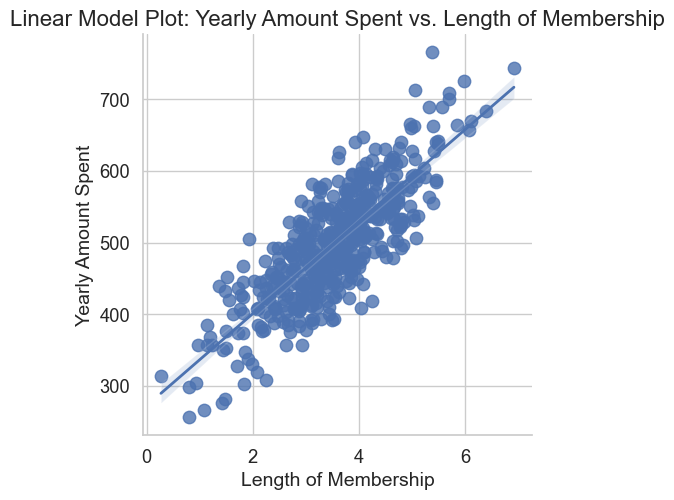

In [41]:

# Set Seaborn style and font scale
sns.set(style='whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Create a linear model plot (lmplot) with adjusted arguments
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, palette='Set1', ci=95, scatter_kws={"s": 80}, line_kws={"lw": 2})

# Add labels and title to the plot
plt.xlabel('Length of Membership', fontsize=14)
plt.ylabel('Yearly Amount Spent', fontsize=14)
plt.title('Linear Model Plot: Yearly Amount Spent vs. Length of Membership', fontsize=16)

# Add grid lines to both axes
plt.grid(True)

# Show the plot
plt.show()



## Trainig and Testing data : 

In [52]:
# Step 1: Define the features (X) and the target variable (Y)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]  # Features (input variables)
Y = df['Yearly Amount Spent']  # Target variable (output variable)

##### We use train_test_split to split the data into training and testing sets.
##### We pass the features (X) and the target variable (Y) to the function as the first two arguments.
##### We set the test_size parameter to 0.3, which means we want to allocate 30% of the data for testing, and the remaining 70% for training.
##### We set the random_state parameter to 42, ensuring that the data will be split consistently every time we run the code.

In [53]:
# Step 2: Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

##### We create a Linear Regression model using LinearRegression.
##### We use the fit method to train the model using the training features (X_train) and the corresponding target variable (Y_train)

In [54]:
# Step 3: Train the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

##### We use the trained model to make predictions on the testing features (X_test).
##### The predicted values are stored in 'Y_pred'.

In [55]:
# Step 4: Test the model on the testing set and make predictions
Y_pred = model.predict(X_test)

##### We use the mean_squared_error function to calculate the mean squared error between the actual target values (Y_test) and the predicted values (Y_pred).
##### We use the r2_score function to calculate the R-squared (coefficient of determination) between Y_test and Y_pred, which indicates how well the model fits the data.
##### We print the mean squared error and the R-squared score to evaluate the model's performance.

In [56]:
# Step 5: Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 103.91554136503235
R-squared: 0.9808757641125857


### Printing out the coefficients of the model : 

In [58]:
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
intercept_df = pd.DataFrame({'Intercept': [model.intercept_]})
print(coefficients_df)
print(intercept_df)

                Feature  Coefficient
0   Avg. Session Length    25.724256
1           Time on App    38.597135
2       Time on Website     0.459148
3  Length of Membership    61.674732
     Intercept
0 -1050.653675


### ** predection Vizualization  **

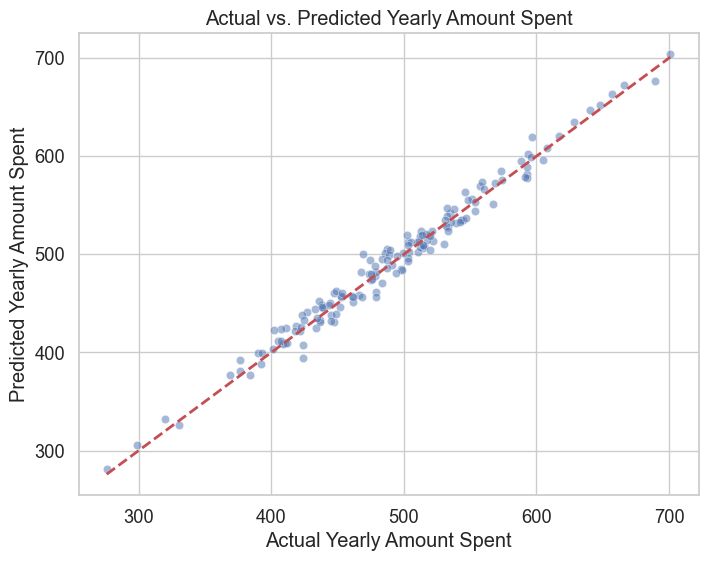

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5, color='b')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs. Predicted Yearly Amount Spent')
plt.show()

## Evaluating the Model : 

In [67]:
# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)
evs = explained_variance_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)
print("Explained Variance Score:", evs)

Mean Squared Error: 103.91554136503235
Mean Absolute Error: 8.426091641432052
R-squared: 0.9808757641125857
Explained Variance Score: 0.9812611651910702


> Mean Squared Error: 103.91554136503235
>
1.Mean Squared Error (MSE): The mean squared error measures the average squared difference between the actual target values and the predicted values. In this case, the MSE is approximately 103.92. Lower values of MSE indicate that the model's predictions are closer to the actual values, indicating a better fit. Since the MSE is relatively small, it suggests that the model's predictions have a small overall error.

> Mean Absolute Error: 8.426091641432052
>
2.Mean Absolute Error (MAE): The mean absolute error computes the average absolute difference between the actual target values and the predicted values. The MAE is approximately 8.43. Similar to MSE, lower values of MAE indicate that the model's predictions are closer to the actual values. The MAE being relatively small suggests that the model's predictions are on average about 8.43 units away from the actual values.

>R-squared: 0.9808757641125857
>
3.R-squared (R²): The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the target variable (Yearly Amount Spent) that is explained by the linear regression model. The R² value ranges from 0 to 1, with higher values indicating a better fit of the model to the data. In this case, the R² value is approximately 0.981, which means that around 98.1% of the variance in the target variable is explained by the model. A high R² value indicates that the model's predictions are closely related to the actual values.

>Explained Variance Score: 0.9812611651910702
>
4.Explained Variance Score: The explained variance score is another metric that indicates the proportion of the variance in the target variable that is explained by the model. The explained variance score also ranges from 0 to 1, and higher values indicate a better fit. Here, the explained variance score is approximately 0.981, which is consistent with the high R² value. It reinforces the notion that the model explains about 98.1% of the variance in the Yearly Amount Spent.

## Residuals

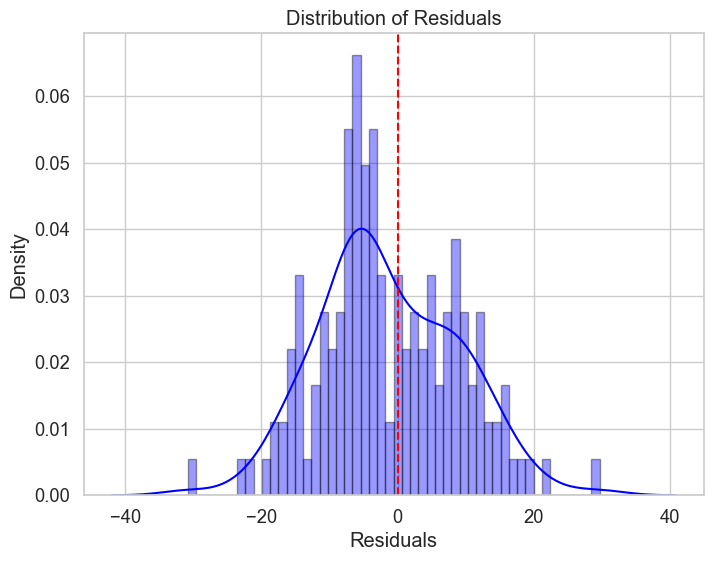

In [78]:

# Calculate the residuals (if not already done)
residuals = Y_test - Y_pred

# Visualize the residuals using a histogram with Seaborn
plt.figure(figsize=(8, 6))
sns.distplot(residuals, bins=50, kde=True, color='blue', hist_kws={'edgecolor': 'black'})
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()


## K-Fold Cross-Validation : 

K-Fold Cross-Validation is a popular technique used for evaluating the performance of a machine learning model on a dataset. It involves dividing the dataset into K subsets or "folds" of approximately equal size. The process can be summarized in the following steps:

In [83]:
# Perform K-Fold Cross-Validation (K=5)
kfold = KFold(n_splits=5)
cv_scores_kfold = cross_val_score(model, X, Y, cv=kfold) 

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores:", cv_scores_kfold)
print("Mean CV Score (K-Fold):", cv_scores_kfold.mean())


K-Fold Cross-Validation Scores: [0.98274654 0.9821047  0.98717189 0.9842572  0.98219012]
Mean CV Score (K-Fold): 0.9836940897539079


## Shuffle Split (Randomized Cross-Validation) : 


Performing Shuffle Split, also known as Randomized Cross-Validation, is another technique used for model evaluation and validation. Unlike K-Fold Cross-Validation, Shuffle Split randomly shuffles the data and splits it into a specified number of train-test sets, without any overlap between the sets. It is especially useful when dealing with large datasets and allows for multiple train-test splits with different random samples.

In [82]:
# Perform Shuffle Split (Randomized Cross-Validation)
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv_scores_shuffle_split = cross_val_score(model, X, Y, cv=shuffle_split)

print("Shuffle Split Cross-Validation Scores:", cv_scores_shuffle_split)
print("Mean CV Score (Shuffle Split):", cv_scores_shuffle_split.mean())


Shuffle Split Cross-Validation Scores: [0.97781306 0.98495869 0.97797783 0.98190201 0.98312723]
Mean CV Score (Shuffle Split): 0.9811557624435128


## Time Series Split (for time-series data) : 

Time Series Split is a specialized technique used for model evaluation and validation with time-series data. In time-series data, the order and time dependency of the observations are essential, making standard cross-validation methods like K-Fold Cross-Validation less suitable. Time Series Split addresses this issue by splitting the data into train and test sets in a way that respects the temporal order of the data.

 ### Note !!! 
 dataset df is not a time-series data and does not have any temporal order or dependency between the observations, then using Time Series Split is not appropriate for my case. Time Series Split is specifically designed for time-series data, where the order and time dependency of the observations matter.

In [ ]:
# Perform Time Series Split (for time-series data)
time_series_split = TimeSeriesSplit(n_splits=5)
cv_scores_time_series_split = cross_val_score(model, X, Y, cv=time_series_split)
print("Time Series Split Cross-Validation Scores:", cv_scores_time_series_split)
print("Mean CV Score (Time Series Split):", cv_scores_time_series_split.mean())